In [2]:
pip install matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


# Simple neural network to predict the sentiment of a movie review. 
    - Features represent the frequency of words in the review. 
    - For simpliclity we will keep only 2 words (bad and good).
    - Each movie is presented by a vector of 2 elements. 
    - The first element is the frequency of the word "good" and the second element is the frequency of the word "bad". 
    - The label is 1 if the review is positive and 0 if the review is negative.


## Define training data

In [3]:
import numpy as np
inputs = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([1,1,1,1,0,0,0,0])

In [4]:
import matplotlib.pyplot as plt
def plot_points(inputs, labels):
    negative = inputs[labels == 0]
    positive = inputs[labels == 1]
    plt.figure(figsize=(4, 4))
    plt.scatter(negative[:, 0], negative[:, 1], color='red', marker='o', label='Negative')
    plt.scatter(positive[:, 0], positive[:, 1], color='blue', marker='x', label='Positive')
    plt.title('Scatter Plot of Inputs by Label')
    plt.xlabel('Frequency of word bad')
    plt.ylabel('Frequency of word good')
    plt.legend()
    plt.grid(True)

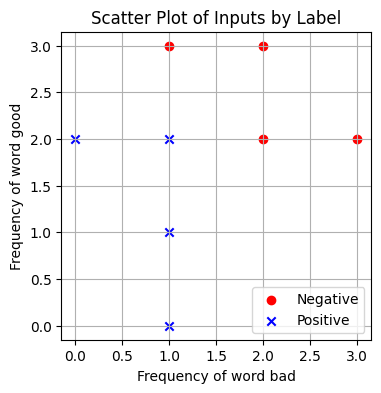

In [5]:
plot_points(inputs, labels)

In [6]:
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, **kwargs)

In [7]:
def score(weights, bias, input):
    return input.dot(weights) + bias

In [8]:
weights = [1,2]
bias = -4

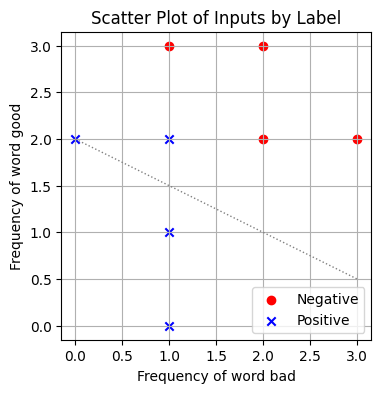

In [9]:
plot_points(inputs, labels)
draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')
plt.show()

In [10]:
score(weights, bias, inputs)

array([-3,  0, -1,  1,  3,  2,  4,  3])

In [11]:
def step(x):
    if x >= 0:
        return 1
    else:
        return 0

In [12]:
def prediction(weights, bias, input):
    return step(score(weights, bias, input))

In [13]:
def error(weights, bias, inputs, label):
    pred = prediction(weights, bias, inputs)
    if pred == label:
        return 0
    else:
        return np.abs(score(weights, bias, inputs))
        

In [14]:
def mean_perceptron_error(weights, bias, inputs, labels):
    total_error = 0
    for input, label in zip(inputs, labels):
        total_error += error(weights, bias, input, label)
    return total_error/len(inputs)

In [15]:
for input, label in zip(inputs, labels):
    print(prediction(weights, bias, input), error(weights, bias, input, label))

0 3
1 0
0 1
1 0
1 3
1 2
1 4
1 3


In [16]:
def train_perceptron(weights, bias, inputs, labels, learning_rate):
    for input, label in zip(inputs, labels):
        if error(weights, bias, input, label) > 0:
            weights = weights + learning_rate * (label - prediction(weights, bias, input))
            bias = bias + learning_rate * (label - prediction(weights, bias, input))
    return weights, bias

In [17]:
train_perceptron(weights, bias, inputs, labels, 0.1)

(array([0.8, 1.8]), -4.199999999999999)